# BIKE BUYERS IN EUROPE

This dataset can be found in Kaggle.com

In [6]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading in the dataset

df = pd.read_csv(r"C:\Users\Henry Oguns\Desktop\5 PROJECTS\2. DATA CLEANING AND MANIPULATION\bike_buyers.csv")

In [3]:
# making the numbers have 0 decimal points

pd.set_option("display.float_format","{:.0f}".format)

In [7]:
# Checking the first 5 rows

df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,NaN,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [8]:
# Getting infomation on the number of rows, columns, memeory used and missin values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [7]:
# checking to see the number missing values in each columns and dropping them

df.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [8]:
df.dropna(inplace = True), df.shape

(None, (952, 13))

In [9]:
df.Age.min(), df.Age.max()

(25.0, 89.0)

In [10]:
# MAking a age range column in the dataset to categorise the age of the people

df.loc[df["Age"] <=40, "Age Range"] = "Adult"
df.loc[df["Age"].between(41,60), "Age Range"] = "Older Adult"
df.loc[df["Age"].between(61,90), "Age Range"] = "Grands"

In [11]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Range
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,Older Adult
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,Older Adult
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,Older Adult
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,Adult
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No,Older Adult


In [9]:
# Renaming the Commute Distance column

df.rename(columns = {"Commute Distance":"Commute Distance(Miles)"}, inplace =True)

df["Commute Distance(Miles)"] = df["Commute Distance(Miles)"].str.split(" ").str[0]

In [10]:
# Mapping the commute distance from 1-5

df["CD(Miles)_cat"]= df["Commute Distance(Miles)"].map({"0-1":1, "1-2": 2, "2-5": 3, "5-10": 4, "10+": 5})

In [14]:
# Mapping the Home Owner and Purchased Bike from 0-1. also creating new columns.

df["HO_cat"]= df["Home Owner"].map({"Yes":1, "No": 0})
df["PB_cat"]= df["Purchased Bike"].map({"Yes":1, "No": 0})

In [15]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance(Miles),Region,Age,Purchased Bike,Age Range,CD(Miles)_cat,HO_cat,PB_cat
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1,Europe,42,No,Older Adult,1,1,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1,Europe,43,No,Older Adult,1,1,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5,Europe,60,No,Older Adult,3,0,0
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1,Europe,36,Yes,Adult,1,0,1
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2,Europe,50,No,Older Adult,2,1,0


In [12]:
# Getting the overall statistic of the dataset

df.describe()

,ID,Income,Children,Cars,Age,CD(Miles)_cat
count,1000,994,992,991,992,1000
mean,19966,56268,2,1,44,3
std,5347,31068,2,1,11,1
min,11000,10000,0,0,25,1
25%,15291,30000,0,1,35,1
50%,19744,60000,2,1,43,2
75%,24471,70000,3,2,52,4
max,29447,170000,5,4,89,5


<AxesSubplot:>

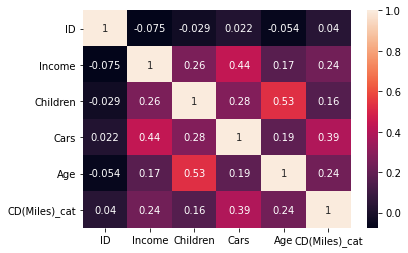

In [11]:
sns.heatmap(df.corr(), annot = True)

There is a corellation between
1. Age and Children
2. Income and Car owners

# Exploratory Analysis

1. how many people bought bike
1. who buy the most bikes m or f
2. who buy the most bikes are married or single
3. buyer by the income
4. which profession buy the most bikes
5. do people that commute for 5-10 miles need more bikes
6. age range that use the bike the most
7. range of the buyer tha own their own homes
8. car owners with the most bought bikes

In [18]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance(Miles)', 'Region',
       'Age', 'Purchased Bike', 'Age Range', 'CD(Miles)_cat', 'HO_cat',
       'PB_cat'],
      dtype='object')

In [51]:
#1.how many people actually bought bike

df['Purchased Bike'].value_counts()

No     496
Yes    456
Name: Purchased Bike, dtype: int64

<AxesSubplot:xlabel='Purchased Bike', ylabel='count'>

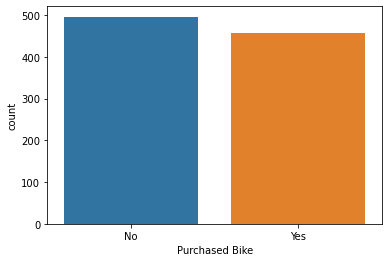

In [40]:
sns.countplot(x = 'Purchased Bike',data = df)

Only 456 people in the dataset bought the bikes

In [75]:
# 2. who buy the most bikes m or f

df1 = df.groupby('Gender')['Purchased Bike'].value_counts()
df1

Gender  Purchased Bike
Female  No                242
        Yes               231
Male    No                254
        Yes               225
Name: Purchased Bike, dtype: int64

231 Female bought more bikes 

In [52]:
#3. who buy the most bikes are married or single

df2 = df.groupby('Marital Status')['Purchased Bike'].value_counts()
df2

Marital Status  Purchased Bike
Married         No                295
                Yes               223
Single          Yes               233
                No                201
Name: Purchased Bike, dtype: int64

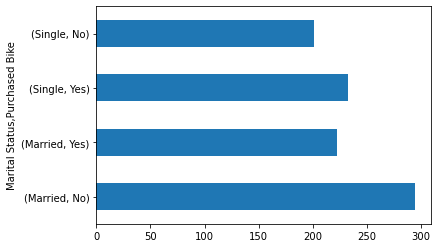

In [37]:
df2.plot.barh(y = 'Purchased Bike', rot = 0);

In [76]:
# 4.which profession buy the most bikes
df3 = df.groupby('Occupation')['Purchased Bike'].value_counts().sort_values(ascending = False)
df3

Occupation      Purchased Bike
Professional    Yes               144
Skilled Manual  No                132
Professional    No                119
Skilled Manual  Yes               110
Management      No                 97
Clerical        No                 86
                Yes                83
Management      Yes                69
Manual          No                 62
                Yes                50
Name: Purchased Bike, dtype: int64

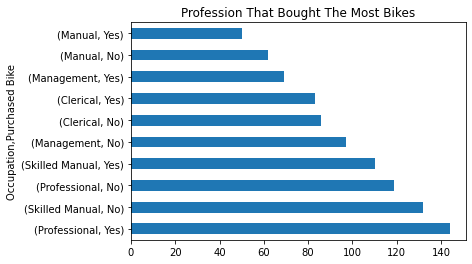

In [91]:
df3.plot.barh(y = 'Occupation', x= 'Purchased Bike')
plt.title('Profession That Bought The Most Bikes')
ylable = ()
plt.show()

In [73]:
#5. do people that commute for 5-10 miles need more bikes
df2 = df.groupby('Commute Distance(Miles)')['Purchased Bike'].value_counts()
df2

Commute Distance(Miles)  Purchased Bike
0-1                      Yes               187
                         No                152
1-2                      No                 88
                         Yes                76
10+                      No                 78
                         Yes                30
2-5                      Yes                92
                         No                 67
5-10                     No                111
                         Yes                71
Name: Purchased Bike, dtype: int64

<AxesSubplot:ylabel='Commute Distance(Miles),Purchased Bike'>

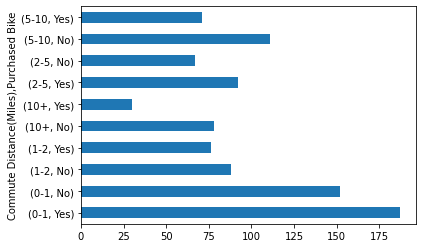

In [74]:
df2.plot.barh(y = 'Commute Distance(Miles)', x= 'Purchased Bike')

In [92]:
#6. age range that bought the bike the most
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance(Miles)', 'Region',
       'Age', 'Purchased Bike', 'Age Range', 'CD(Miles)_cat', 'HO_cat',
       'PB_cat'],
      dtype='object')

In [97]:
df5 = df[df.PB_cat==1]
df5.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance(Miles),Region,Age,Purchased Bike,Age Range,CD(Miles)_cat,HO_cat,PB_cat
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1,Europe,36,Yes,Adult,1,0,1
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,0-1,Europe,43,Yes,Older Adult,1,1,1
10,22173,Married,Female,30000,3,High School,Skilled Manual,No,2,1-2,Pacific,54,Yes,Older Adult,2,0,1
13,25323,Married,Male,40000,2,Partial College,Clerical,Yes,1,1-2,Europe,35,Yes,Adult,2,1,1
14,23542,Single,Male,60000,1,Partial College,Skilled Manual,No,1,0-1,Pacific,45,Yes,Older Adult,1,0,1


<AxesSubplot:xlabel='Age Range', ylabel='count'>

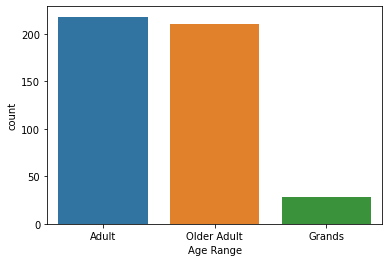

In [106]:
sns.countplot(x = 'Age Range', data = df5)

<AxesSubplot:xlabel='Home Owner', ylabel='count'>

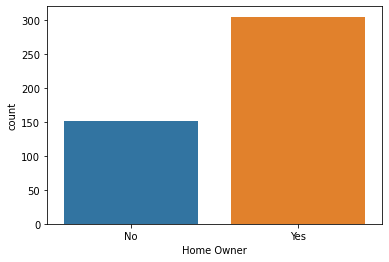

In [111]:
#7. range of the buyer tha own their own homes
sns.countplot(x = 'Home Owner', data = df5)

<AxesSubplot:xlabel='Cars', ylabel='count'>

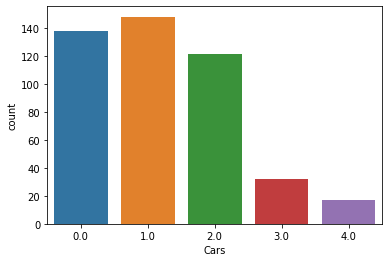

In [112]:
#8. car owners with the most bought bikes
sns.countplot(x = 'Cars', data = df5)